In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from phik import resources

In [3]:
df = pd.read_csv('D:/diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.groupby('gender')['age'].agg(['mean','count']) # групируем по полу. Деалем выввод, что больше женщин в датасете. Средний возраст 42.5 года

,mean,count
gender,,
Female,42.463291,58552
Male,41.075139,41430
Other,29.555556,18


In [5]:
df.dtypes # определяем тип данных столбцов

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df.isnull().sum() # проверяем на нулевые значения

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.nunique() # уникальные значения

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

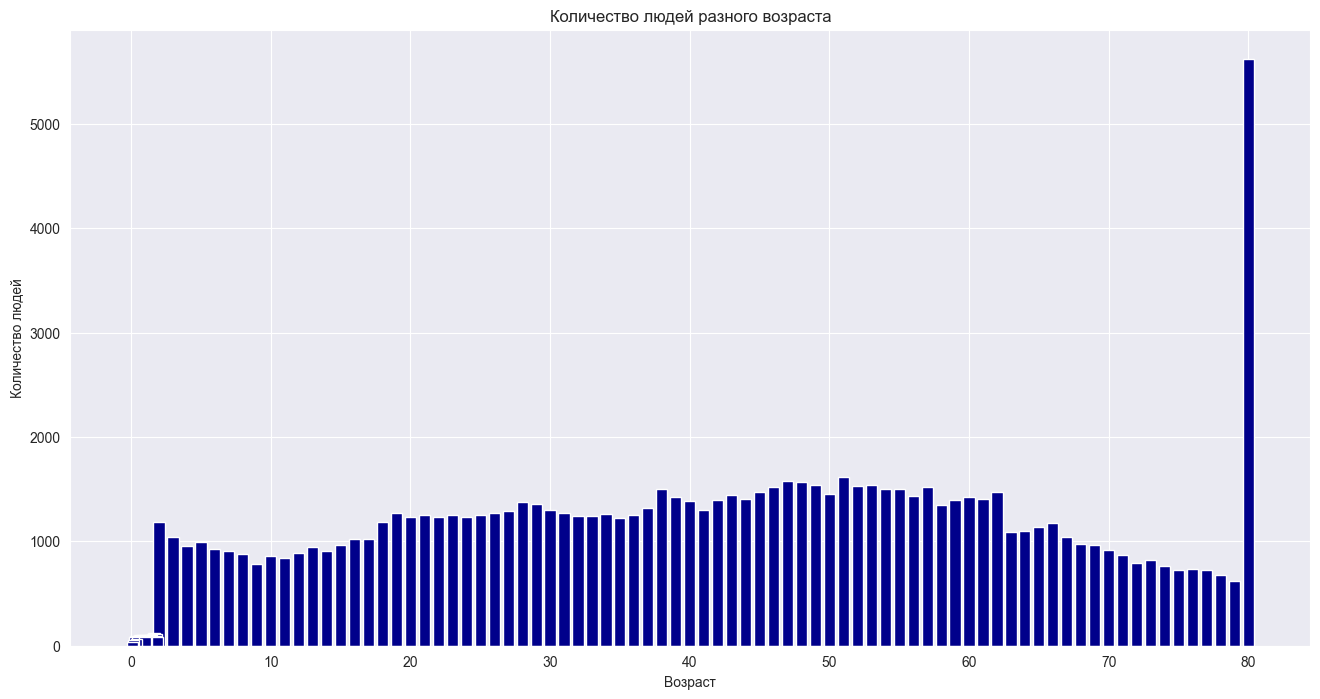

In [8]:
quality_counts = df['age'].value_counts()

plt.figure(figsize=(16, 8))
plt.bar(quality_counts.index, quality_counts, color='darkblue')
plt.title('Количество людей разного возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show() # людей в 80 лет больше, так как учет идет за 80 лет и более

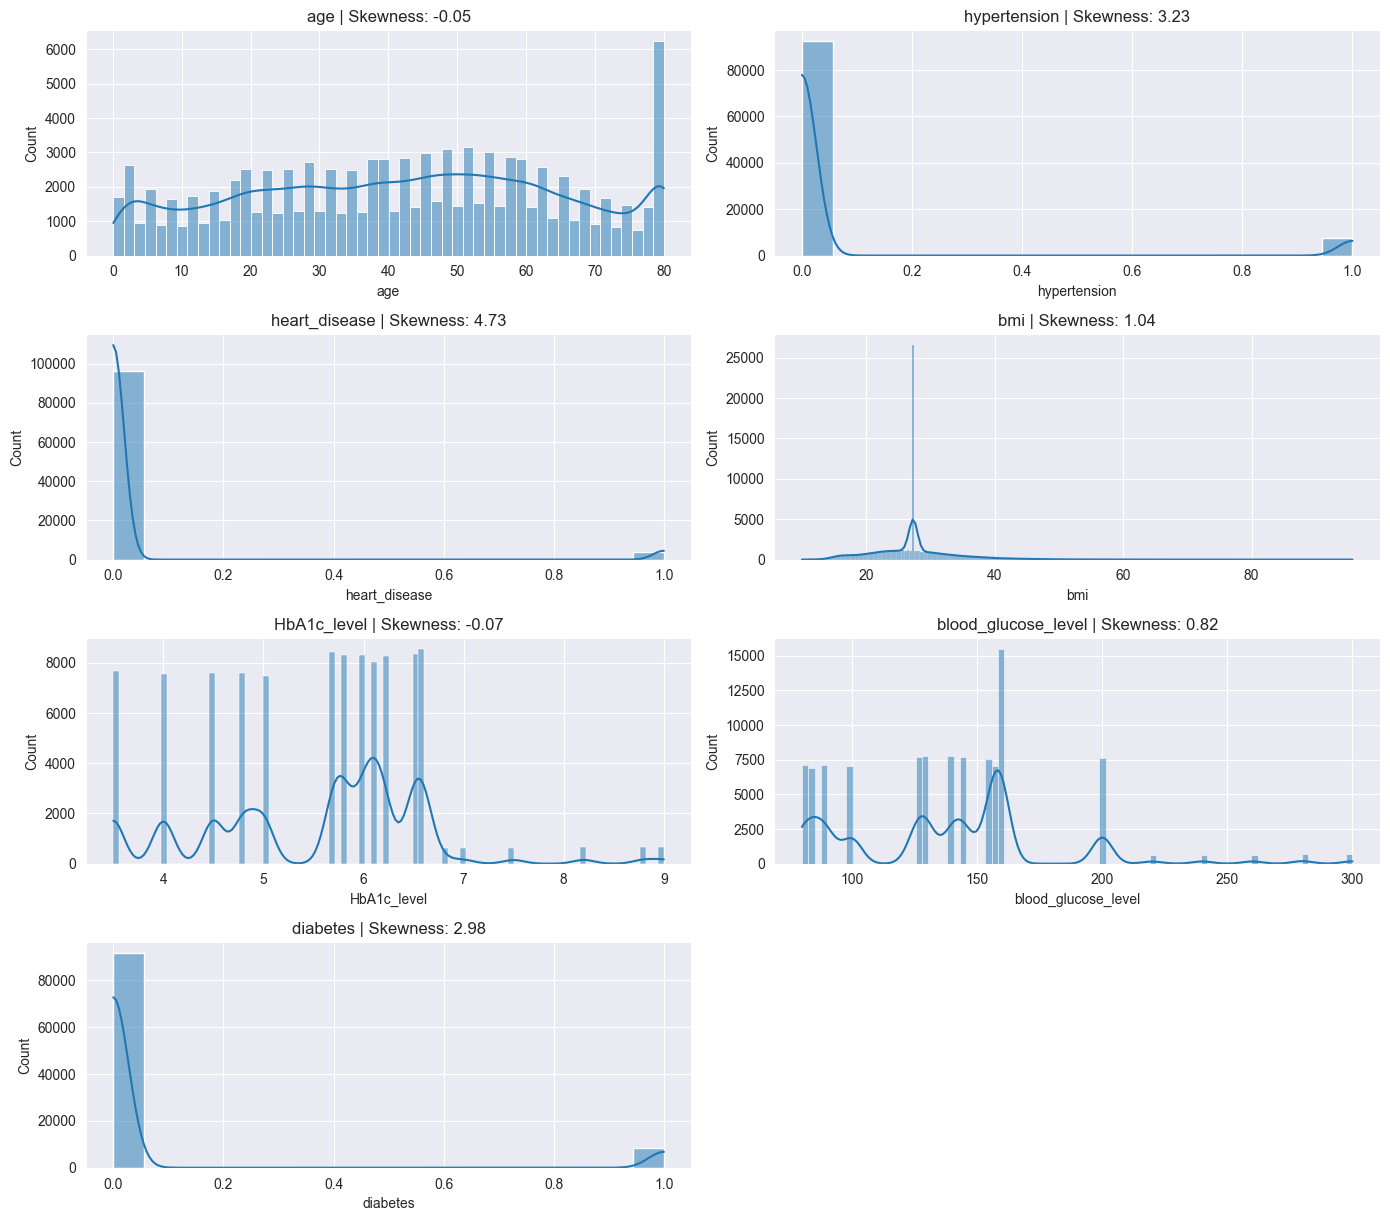

In [9]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show() # распределение по всем показателям

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


<Axes: >

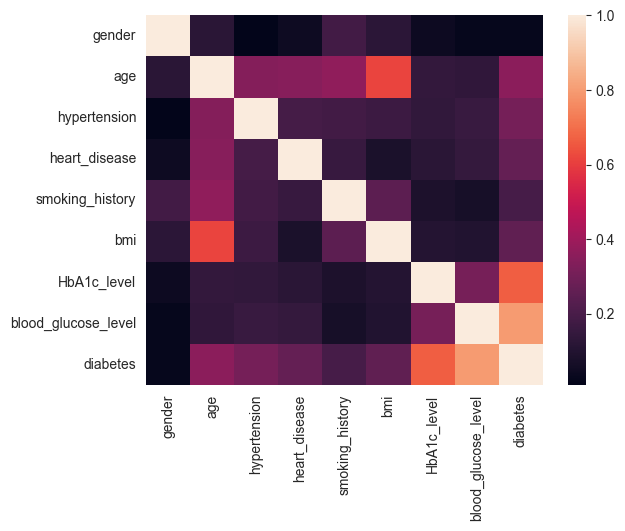

In [10]:
phik_overview = df.phik_matrix()
sns.heatmap(phik_overview) # Тепловая карта, делаем вывод, что есть зависимости от показателей

In [11]:
smoking_mapping = {
    'never': 0,
    'not current': 0,
    'current': 1,
    'former': 1,
    'ever': 1,
    'No Info': 2
}

# Нормализация значений когда-либо курящих и курящих на 1, в ином случае 0, 2 - нет информации
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)

# Проверка результата
print(df['smoking_history'].unique())

[0 2 1]


In [12]:
unique_values = df["smoking_history"].unique()
print("Уникальные значения в столбце 'smoking_history':")
print(unique_values)

Уникальные значения в столбце 'smoking_history':
[0 2 1]


In [13]:
f_m_alco = pd.crosstab(df['gender'], df['smoking_history'])
f_alco = f_m_alco.iloc[0][1]/(f_m_alco.iloc[0][1]+f_m_alco.iloc[0][0])
m_alco = f_m_alco.iloc[1][1]/(f_m_alco.iloc[1][1]+f_m_alco.iloc[1][0])
print(m_alco)
print(f_alco) # процент курящих женщин и процент курящих мужчин, больше курят мужчины

0.4174960505529226
0.31066611757438484


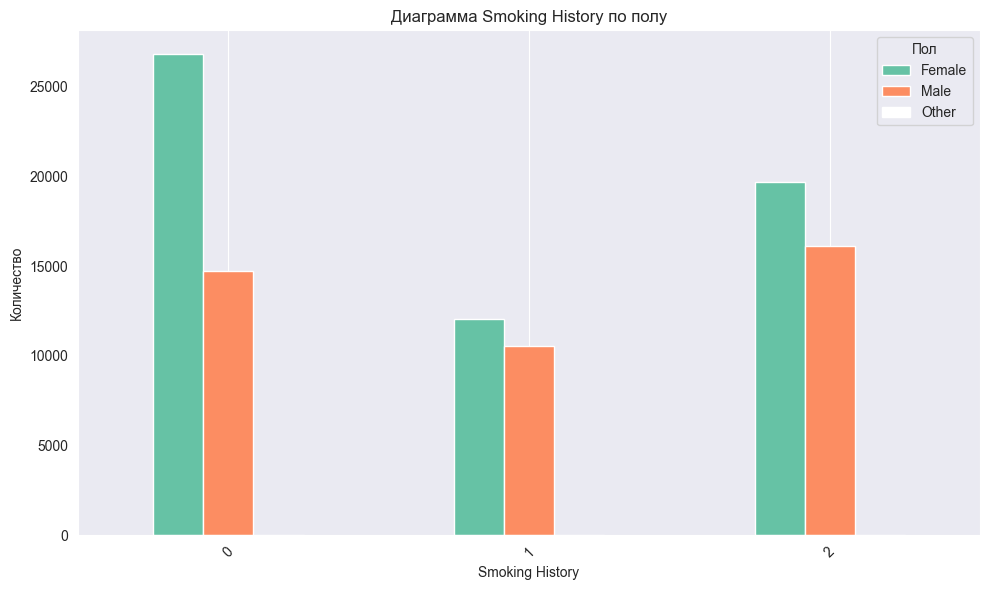

In [14]:
grouped = df.groupby(['smoking_history', 'gender']).size().unstack(fill_value=0)

# Построение группированной столбчатой диаграммы
grouped.plot(kind='bar', figsize=(10, 6), color=['#66c2a5', '#fc8d62','#ffffff'])

plt.title('Диаграмма Smoking History по полу')
plt.xlabel('Smoking History')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.grid(axis='y')
plt.tight_layout()
plt.show() # диаграмма количества курящих и не курящих людей, группированная по полу

In [15]:
print(df[df['smoking_history'] == 0]['age'].mean())
print(df[df['smoking_history'] == 1]['age'].mean())
print(df[df['smoking_history'] == 2]['age'].mean())
# средний возраст курящих и некурящих
# 0 - не курят, 1 - курят или курили, 2 - нет инфо

44.480930142987816
50.329497394223125
33.538036631672995


Корреляция между 'diabetes' и 'blood_glucose_level': 0.4196
Корреляция между 'diabetes' и 'HbA1c_level': 0.4007
Корреляция между 'diabetes' и 'bmi': 0.2144
Корреляция между 'diabetes' и 'age': 0.2580


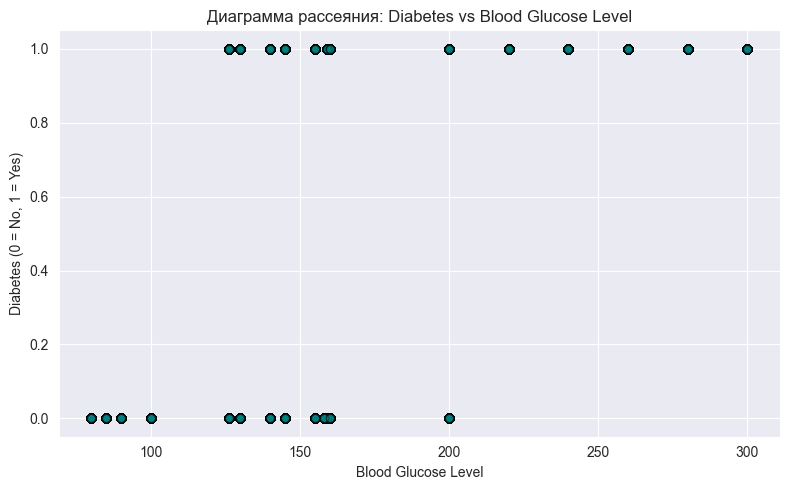

In [16]:

features = ['blood_glucose_level','HbA1c_level', 'bmi', 'age']

# Словарь для хранения корреляций
correlations = {}

# Вычисление корреляции для каждого признака
for feature in features:
    corr = df['diabetes'].corr(df[feature])
    correlations[feature] = corr
    print(f"Корреляция между 'diabetes' и '{feature}': {corr:.4f}")

# диаграмма рассеяния
plt.figure(figsize=(8, 5))
plt.scatter(df['blood_glucose_level'], df['diabetes'], alpha=0.5, color='teal', edgecolors='k')
plt.title('Диаграмма рассеяния: Diabetes vs Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.tight_layout()
plt.show()

Наблюдаем положительную корреляцию по всем парамметрам

C:\Users\Андрей\AppData\Local\Temp\ipykernel_13348\103325184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette='Set2')


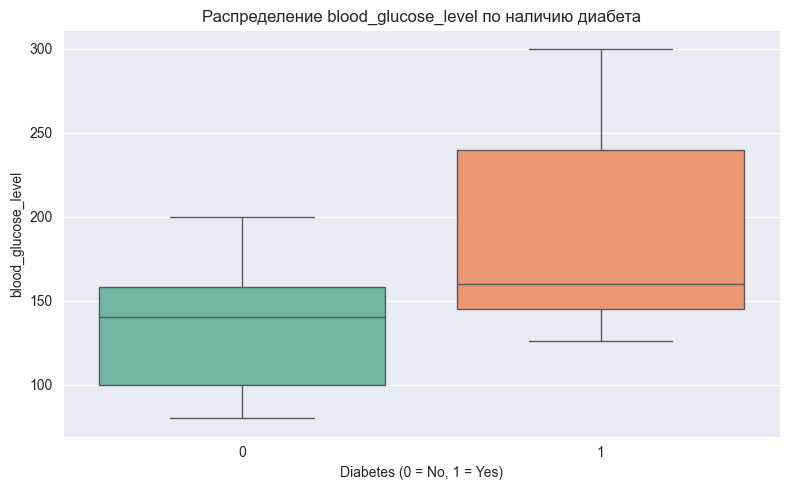

C:\Users\Андрей\AppData\Local\Temp\ipykernel_13348\103325184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette='Set2')


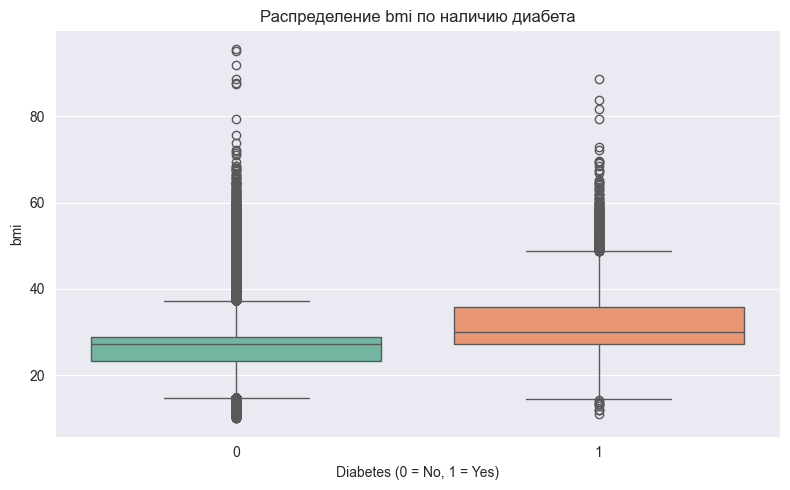

C:\Users\Андрей\AppData\Local\Temp\ipykernel_13348\103325184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette='Set2')


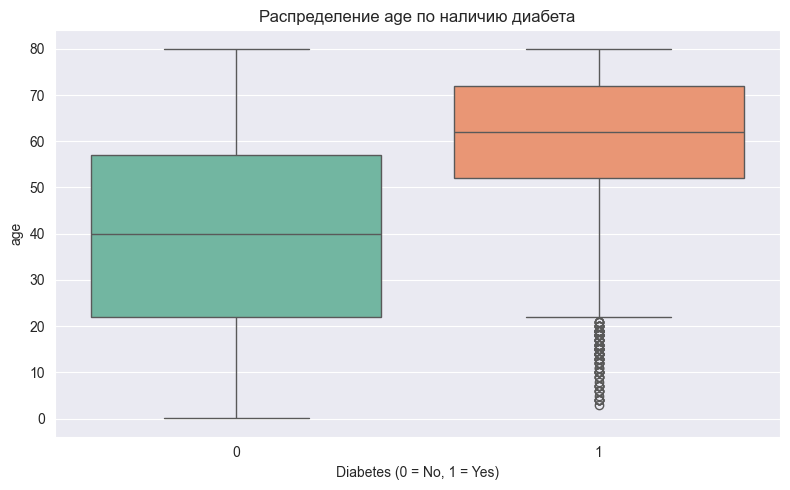

C:\Users\Андрей\AppData\Local\Temp\ipykernel_13348\103325184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=feature, data=df, palette='Set2')


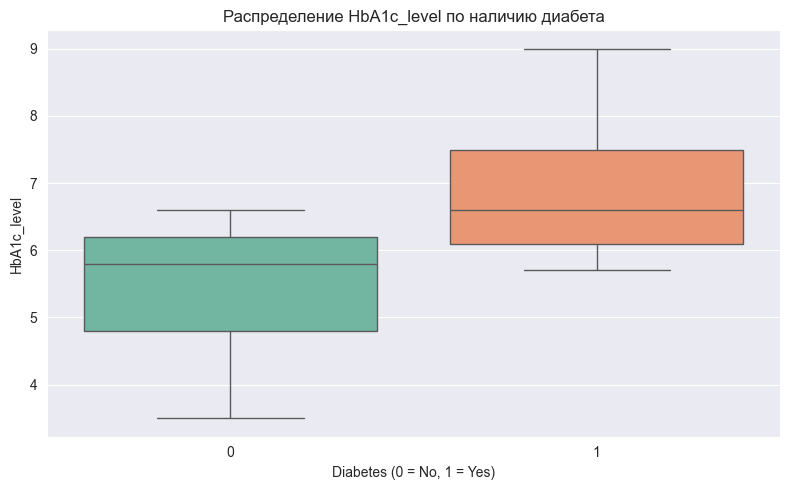

In [17]:
features = ['blood_glucose_level', 'bmi', 'age','HbA1c_level']

# Построение boxplot для каждого признака
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='diabetes', y=feature, data=df, palette='Set2')
    plt.title(f'Распределение {feature} по наличию диабета')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

 По результатам наблюдаем, что дибет наблюдается у людей с большим уровнем сахара в крови.
 Тоже самое связано с возрастом, ИМТ и гликированным гемоглобином


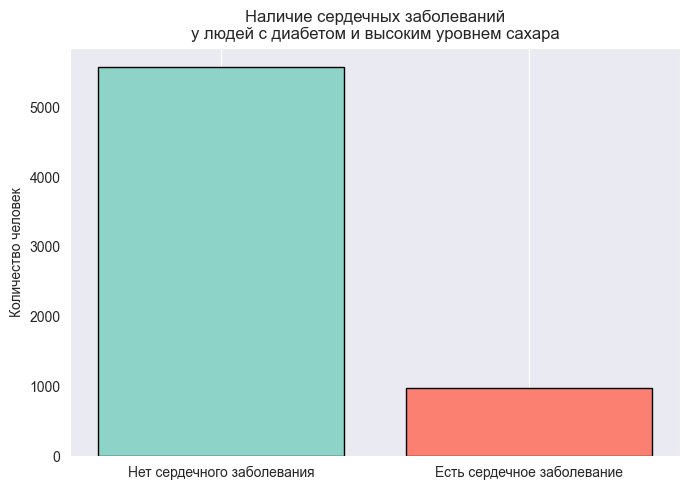

In [18]:
# Фильтрация: диабет и повышенный уровень сахара (например, > 140)
high_glucose_diabetes = df[(df['diabetes'] == 1) & (df['blood_glucose_level'] > 140)]

# Подсчёт количества с/без сердечных заболеваний
heart_counts = high_glucose_diabetes['heart_disease'].value_counts().sort_index()

# Построение графика
labels = ['Нет сердечного заболевания', 'Есть сердечное заболевание']

plt.figure(figsize=(7, 5))
plt.bar(labels, heart_counts, color=['#8dd3c7', '#fb8072'], edgecolor='black')
plt.title('Наличие сердечных заболеваний\nу людей с диабетом и высоким уровнем сахара')
plt.ylabel('Количество человек')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Делаем, вывод, не у всех людей с диабетом есть сердечные заболевания.Делаем, вывод, не у всех людей с диабетом есть сердечные заболевания.